<a href="https://colab.research.google.com/github/happy-jihye/Cartoon-StyleGan2/blob/master/Cartoon_StyleGAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec 24 13:08:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Cartoonize Yourself !


> ✔ In this notebook, we are going to **change the facial expression 😊** of the character using a model that **Finetuned StyleGAN2** :) 
> I trained the model using Dataset([Naver Webtoon](https://www.webtoons.com/en/), [Disney](https://github.com/justinpinkney/toonify), [Metface](https://github.com/NVlabs/metfaces-dataset)) and [Stylegan2](https://github.com/NVlabs/stylegan2)-FFHQ256 pretrained model.
> 
> I used <font color='#2C4D88'><b>(1) StyleCLIP's latent optimization</b></font> and <font color='#2C4D88'><b>(2) SeFA</b></font> as models to change facial expressions.

- 👩🏻‍💻 Developer : [Jihye Back](https://github.com/happy-jihye)
- Reference : [`rosinality/stylegan2-pytorch`](https://github.com/rosinality/stylegan2-pytorch), [`bryandlee/stylegan2-encoder-pytorch`](https://github.com/bryandlee/stylegan2-encoder-pytorch), [`orpatashnik/StyleCLIP`](https://github.com/orpatashnik/StyleCLIP), [`genforce/sefa`](https://genforce.github.io/sefa/)

## 1. SetUp and Download pretrained model

In [ ]:
#@markdown 1.1 Git clone Make_your_charactor

# -----------------------------
# Git Clone (Private Repository)
# -----------------------------

!git clone https://github.com/happy-jihye/Cartoon-StyleGan2.git

# -----------------------------
#@markdown 1.2 Download CLIP from openAI
# -----------------------------

import os
os.chdir(f'./Cartoon-StyleGan2')

#파이토치 버전 다운그레이드
!pip uninstall torch
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install git+https://github.com/n-CLAIR/nsml-local
!pip install ftfy regex tqdm ninja gdown
!pip install git+https://github.com/openai/CLIP.git
#!pip install wandb
#!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html


In [ ]:
#@markdown Download StyleGAN2 pretrained model !

from utils import download_pretrained_model

DownLoad_All = True #@param {type:"boolean"}
DownLoad_Single_Pretrained_Model = 'ffhq256' #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']

if DownLoad_All:
  download_pretrained_model()
else:
  
  download_pretrained_model(False, "ffhq256.pt")
  download_pretrained_model(False, f"{DownLoad_Single_Pretrained_Model}.pt")

In [2]:
from google.colab import drive 
drive.mount('/gdrive/',force_remount=True)

Mounted at /gdrive/


In [3]:
import torch
print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

torch.cuda.get_device_name(0)

Torch version:1.8.0+cu111
cuda version: 11.1
cudnn version:8005


'Tesla T4'

In [10]:
#경로설정
cd gdrive/MyDrive/Con

/gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con


In [ ]:
#학습코드 FreezeGD
!python Cartoon-StyleGan2/train.py --batch=8 --ckpt=/gdrive/MyDrive/Con/expr/checkpoints/310000.pt --freezeG=4 --freezeD=3 --augment --wandb --path=/gdrive/MyDrive/Con/DATA/LMDB

load model: /gdrive/MyDrive/Con/expr/checkpoints/310000.pt
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13.5
wandb: Run data is saved locally in /gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con/wandb/run-20221115_142710-doupn7ep
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run unique-terrain-6
wandb: ⭐️ View project at https://wandb.ai/stylegan/stylegan%202
wandb: 🚀 View run at https://wandb.ai/stylegan/stylegan%202/runs/doupn7ep
d: 0.03

In [ ]:
# 학습코드 2
!python Cartoon-StyleGan2/new_data_train.py --batch=8 --ckpt=/gdrive/MyDrive/Con/new_data_expr/checkpoints/250000.pt --freezeStyle=2 --freezeG=4 --freezeD=3 --augment --wandb --path=/gdrive/MyDrive/Con/new_data/LMDB

load model: /gdrive/MyDrive/Con/new_data_expr/checkpoints/250000.pt
d: 0.1244; g: 2.2597; r1: 0.0057; path: 0.0000; mean path: 0.0000; augment: 0.0000:  31% 250000/800000 [00:07<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
d: 0.0295; g: 4.0037; r1: 0.0066; path: 0.0000; mean path: 0.0000; augment: 0.0380:  32% 252415/800000 [1:55:51<438:17:18,  2.88s/it]

In [11]:
cd Cartoon-StyleGan2

/gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con/Cartoon-StyleGan2


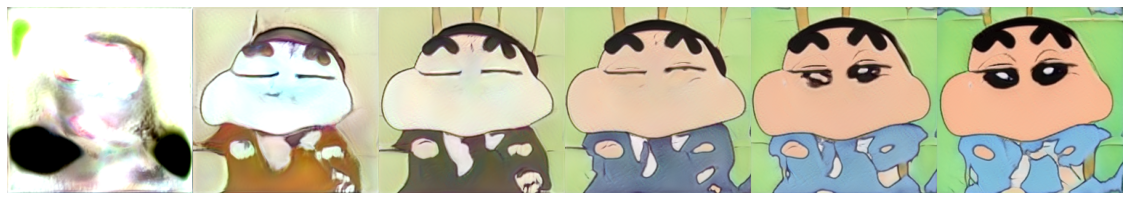

In [ ]:

from model import Generator
from utils import imshow, tensor2image

network2=f'/gdrive/MyDrive/Con/new_data_expr/checkpoints/252000.pt' 
network2 = torch.load(network2)

generator2 = Generator(256, 512, 8, channel_multiplier=2).to('cuda')
generator2.load_state_dict(network2["g_ema"], strict=False)

trunc2 = generator2.mean_latent(4096)

latent2 = generator2.get_latent(latent)


number_of_step = 6 #@param {type:"slider", min:0, max:10, step:1}
latent_interp = torch.zeros(number_of_step, latent.shape[1], latent.shape[2]).to('cuda')

with torch.no_grad():
    for j in range(number_of_step):

        latent_interp[j] = latent + (latent2-latent) * float(j/(number_of_step-1))
                                
        imgs_gen2, _ = generator2([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc2,
                                swap=False, swap_layer_num=1, swap_layer_tensor=2,
                                )

imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen2], dim=2)), 20)

## Generate Images using Pretrained model !🙃

In [12]:
#Pretrained 모델로 이미지 생성 후 저장
import os
import torch
import cv2 
import numpy as np
from torchvision.utils import save_image, make_grid
import PIL.Image as pilimg

from model import Generator


device='cuda'
n_sample=6
truncation = 0.7


# =============================================

# Genearaotr1
network1 = 'ffhq256'  #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
network1 = f'/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/{network1}.pt' 
network1 = torch.load(network1)

g1 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g1.load_state_dict(network1["g_ema"], strict=False)
trunc1 = g1.mean_latent(4096)

# Generator2
network2 = 'NaverWebtoon_StructureLoss' #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
network2 = f'/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/{network2}.pt' 
network2 = torch.load(network2)

g2 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g2.load_state_dict(network2["g_ema"], strict=False)
trunc2 = g2.mean_latent(4096)

# Generator3
network3 = 'Disney_StructureLoss' #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
network3 = f'/gdrive/MyDrive/Con/expr/checkpoints/476000.pt' 
network3 = torch.load(network3)

g3 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g3.load_state_dict(network3["g_ema"], strict=False)
trunc3 = g3.mean_latent(4096)

# Generator4
network4 = 'Metface_StructureLoss' #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
network4 = "/gdrive/MyDrive/Con/new_data_expr/checkpoints/146000.pt"
network4 = torch.load(network4)

g4 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g4.load_state_dict(network4["g_ema"], strict=False)
trunc4 = g4.mean_latent(4096)


# =============================================

# directory to save image
outdir = 'results' #@param {type:"string"}
if not os.path.isdir(f'{outdir}'):
   os.makedirs(f'./asset/{outdir}', exist_ok=True)

imgs = []
number_of_img = 11 #@param {type:"slider", min:0, max:30, step:1}
number_of_step = 7 #@param {type:"slider", min:0, max:10, step:1}

swap = True #@param {type:"boolean"}
swap_layer_num = 2 #@param {type:"slider", min:1, max:6, step:1}

with torch.no_grad():

  latent1 = torch.randn(1, 14, 512, device=device)
  latent1 = g1.get_latent(latent1)
  latent_interp = torch.zeros(1, latent1.shape[1], latent1.shape[2]).to(device)

  for i in range(number_of_img):
      # latent1

      latent2 = torch.randn(1, 14, 512, device=device)
      latent2 = g1.get_latent(latent2)


      for j in range(number_of_step):

          latent_interp = latent1 + (latent2-latent1) * float(j/(number_of_step-1))

          imgs_gen1, save_swap_layer = g1([latent_interp],
                                  input_is_latent=True,                                     
                                  truncation=0.7,
                                  truncation_latent=trunc1,
                                  swap=swap, swap_layer_num=swap_layer_num,
                                  randomize_noise=False)
          imgs_gen2, _ = g2([latent_interp],
                                  input_is_latent=True,                                     
                                  truncation=0.7,
                                  truncation_latent=trunc2,
                                  swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                  )
          imgs_gen3, _ = g3([latent_interp],
                                  input_is_latent=True,                                     
                                  truncation=0.7,
                                  truncation_latent=trunc3,
                                  swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                  )
          imgs_gen4, _ = g4([latent_interp],
                                  input_is_latent=True,                                     
                                  truncation=0.7,
                                  truncation_latent=trunc4,
                                  swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                  )

                          
          grid = make_grid(torch.cat([imgs_gen1, imgs_gen2, imgs_gen3, imgs_gen4], 0),
                            nrow=4,
                            normalize=True,
                            range=(-1,1),
                            )
          ffhq_grid=make_grid(torch.cat([imgs_gen1],0),nrow=1,normalize=True,range=(-1,1),)

          ffhq_ndarr = ffhq_grid.mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()
          ffhq_im=pilimg.fromarray(ffhq_ndarr)
          ffhq_im.save(f'/gdrive/MyDrive/Con/Cartoon-StyleGan2/asset/{outdir}/ffhq_out-{i*number_of_step+j}.png')

          ndarr = grid.mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()
          im = pilimg.fromarray(ndarr)
          im.save(f'/gdrive/MyDrive/Con/Cartoon-StyleGan2/asset/{outdir}/out-{i*number_of_step+j}.png')


      latent1 = latent2

/usr/local/lib/python3.8/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


### **[ Example 3 ]**

Project your image with a late space and run it !🎉

In [ ]:
from google.colab import files
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
image_name = image_name.split('.')

Saving 증명사진.jpg to 증명사진.jpg


In [ ]:
cd ../gdrive/MyDrive/Con/Cartoon-StyleGan2

/gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con/Cartoon-StyleGan2


In [ ]:
from PIL import Image

im = Image.open("/gdrive/MyDrive/Con/Cartoon-StyleGan2/증명사진_외국.jpg")
print(im.size)
im = im.resize((256,256))
im.save("/gdrive/MyDrive/Con/Cartoon-StyleGan2/증명사진_외국.jpg")

(256, 256)


In [ ]:
#Project your own image and Make Eigenvector of latent spaces (by pretrained model)

!python projector.py --ckpt=/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt --factor='networks/factor' --e_ckpt=/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/encoder_ffhq.pt \
                            --files=/gdrive/MyDrive/Con/Cartoon-StyleGan2/경통여신.jpg --step 7000

Setting up Perceptual loss...
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:02<00:00, 202MB/s]
Loading model from: /gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con/Cartoon-StyleGan2/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
perceptual: 0.2285; noise regularize: 0.1084; reconstruction: 0.0335; mse_img: 0.0335; mse_latent: 0.0433; lr: 0.0100 |:   9% 602/7000 [01:42<18:10,  5.87it/s]
Traceback (most recent call last):



In [14]:
#위의 projector.py로 projector한 이미지 불렁오기
import torch

project = torch.load("/gdrive/MyDrive/Con/Cartoon-StyleGan2/yks_project.pt")
project_result = project['경통여신']['latent']
torch.save(project_result, '/gdrive/MyDrive/Con/Cartoon-StyleGan2/yks_latent.pt')

project = torch.load('/gdrive/MyDrive/Con/Cartoon-StyleGan2/yks_latent.pt').cuda()
print(project.shape)

torch.Size([1, 14, 512])


In [ ]:
cd ../gdrive/MyDrive/Con/Cartoon-StyleGan2/

/gdrive/.shortcut-targets-by-id/1Az7KjicL6ePenQHSLrT767jEsnguPR-k/Con/Cartoon-StyleGan2


In [17]:
seed = 356289 #@param {type:"slider", min:0, max:1000000, step:1}

target_network = 'ffhq256' #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
description = 'smiling face' #@param {type:"string"}

latent_path = "/gdrive/MyDrive/Con/Cartoon-StyleGan2/yks_latent.pt" #@param {type:"string"}

optimization_steps = 300 #@param {type:"number"}

l2_lambda = 0.004 #@param {type:"number"}

create_video = False #@param {type:"boolean"}

result_dir = "asset/results5" #@param {type:"string"}

device = 'cuda'

# -----------------------------
args = {
    "seed" : seed,
    "description": description,
    "ckpt": "/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt",
    "ckpt2": f"/gdrive/MyDrive/Con/new_data_expr/checkpoints/146000.pt",
    "stylegan_size": 256,
    "latent_dim" : 14,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "l2_lambda": l2_lambda,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "device" : "cuda",
    "results_dir": result_dir,
}

# -----------------------------

from run_optimization import main
from argparse import Namespace

final_result, latent_init3, latent_fin3 = main(Namespace(**args))


100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 54.0MiB/s]
loss: 0.6787;: 100%|██████████| 300/300 [01:04<00:00,  4.67it/s]


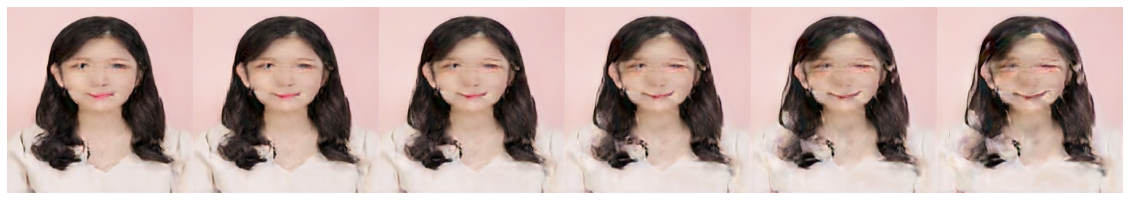

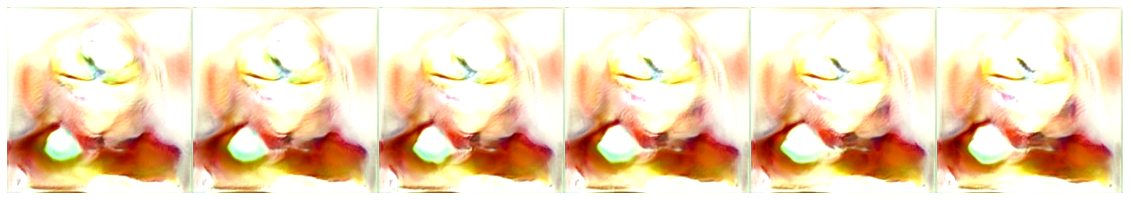

In [18]:
# -----------------------------
# 학습 부족과 ffhq256데이터로 학습된 pretrained모델이라 한국인 이미지를 제대로 생성하지 못함.
import torch

from model import Generator
from utils import imshow, tensor2image

device = 'cuda'

# ---------------
# Generator
# ---------------

# Generator1
network1='/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt' #'/gdrive/MyDrive/Con/new_data_expr/checkpoints/134000.pt'#'/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt' 
network1 = torch.load(network1)

generator1 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator1.load_state_dict(network1["g_ema"], strict=False)

trunc1 = generator1.mean_latent(4096)

# Generator2
Target_network = "ffhq256" #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
network2=f'/gdrive/MyDrive/Con/new_data_expr/checkpoints/146000.pt' 
network2 = torch.load(network2)

generator2 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator2.load_state_dict(network2["g_ema"], strict=False)

trunc2 = generator2.mean_latent(4096)

# ---------------
# Interpolation
# ---------------

number_of_step = 6 #@param {type:"slider", min:0, max:10, step:1}
latent_interp = torch.zeros(number_of_step, latent_init3.shape[1], latent_init3.shape[2]).to(device)

sample_z_style = torch.randn(number_of_step, 512, device=device)
strength = 1 #@param {type:"slider", min:1, max:5, step:0.5}
swap = False #@param {type:"boolean"}
swap_layer_num = 1 #@param {type:"slider", min:1, max:6, step:1}

with torch.no_grad():
    for j in range(number_of_step):

        latent_interp[j] = latent_init3 + strength * (latent_fin3-latent_init3) * float(j/(number_of_step-1))
        
        imgs_gen1, save_swap_layer = generator1([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc1,
                                swap=swap, swap_layer_num=swap_layer_num,
                                randomize_noise=False)
        imgs_gen2, _ = generator2([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc2,
                                swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                randomize_noise=True,
                                )
imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen1], dim=2)), 20)
imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen2], dim=2)), 20)

## 3. Style Mixing

Inspired by style mixing, I mixed style vectors of two images. Just mixing two different images with different feelings creates a high-quality image.

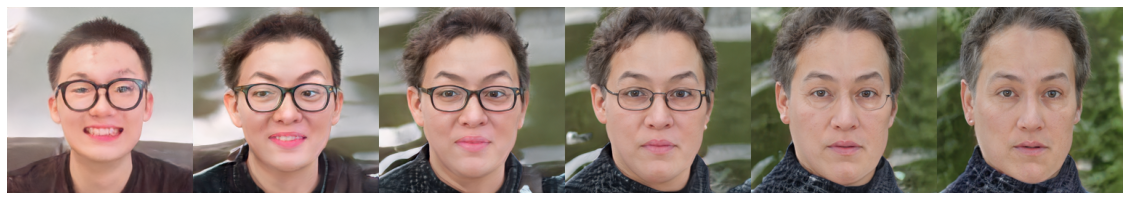

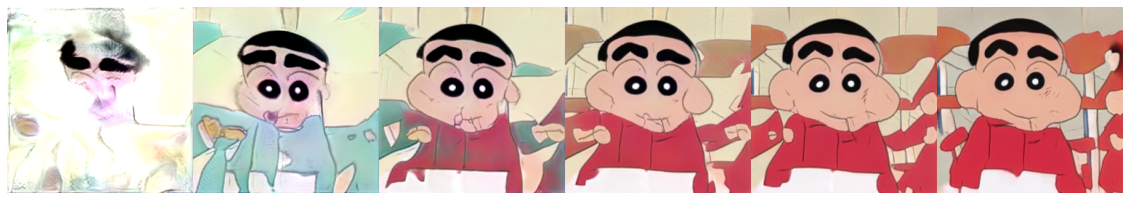

In [19]:
#@title { display-mode: "form", run: "auto"}
#한국인 이미지를 ffhq외국인 이미지로 변환하고 짱구 이미지로 다시 변환하는것이 결과가 더 잘나오는 것을 볼 수 있음.

import torch

from model import Generator
from utils import imshow, tensor2image

device = 'cuda'
Target_network = "Romance101" #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
swap = False #@param {type:"boolean"}
save_swap_layer = 1 #@param {type:"slider", min:1, max:6, step:1}
swap_layer_num = 2 #@param {type:"slider", min:1, max:6, step:1}

project = torch.load("/gdrive/MyDrive/Con/Cartoon-StyleGan2/lkw_happy_project.pt")
project_result = project['happy_gw']['latent']
#print(project_result)

# ---------------
# Generator
# ---------------

# Generator1
network1='/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt'
network1 = torch.load(network1)

generator1 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator1.load_state_dict(network1["g_ema"], strict=False)

trunc1 = generator1.mean_latent(4096)

# latent1
seed1 = 627356 #@param {type:"slider", min:0, max:1000000, step:1}
torch.manual_seed(seed1)
#latent1 = torch.randn(1, 14, 512, device=device)
latent1 = generator1.get_latent(project_result)


# Generator2
network2=f'/gdrive/MyDrive/Con/expr/checkpoints/476000.pt' 
network2 = torch.load(network2)

generator2 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator2.load_state_dict(network2["g_ema"], strict=False)

trunc2 = generator2.mean_latent(4096)

# latent2
seed2 = 159972 #@param {type:"slider", min:0, max:1000000, step:1}
torch.manual_seed(seed2)
#latent2 = torch.randn(1, 14, 512, device=device)
latent2 = generator2.get_latent(project_result)

# ---------------
# Interpolation
# ---------------
latent1=project_result

number_of_step = 6 #@param {type:"slider", min:0, max:10, step:1}
latent_interp = torch.zeros(number_of_step, latent1.shape[1], latent1.shape[2]).to(device)

with torch.no_grad():
    for j in range(number_of_step):

        latent_interp[j] = latent1 + (latent2-latent1) * float(j/(number_of_step-1))

        imgs_gen1, save_extract_layer = generator1([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc1,
                                swap=swap, swap_layer_num=swap_layer_num,
                                )
                                
        imgs_gen2, _ = generator2([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc2,
                                swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                )

imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen1], dim=2)), 20)
imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen2], dim=2)), 20)

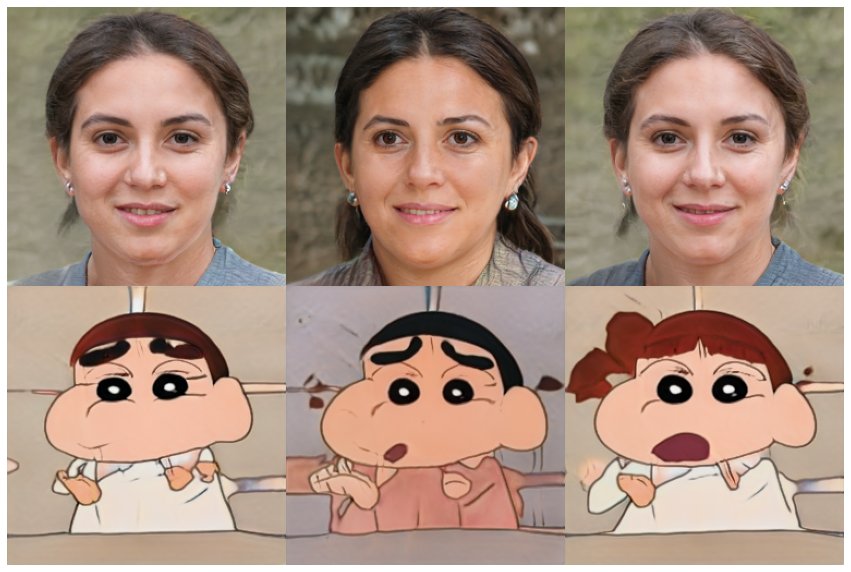

In [23]:
from utils import imshow, tensor2image
import torch

from model import Generator
from utils import imshow, tensor2image

device = 'cuda'
truncation = 0.4

target_network ="Romance101" #@param ['ffhq256', 'NaverWebtoon', 'NaverWebtoon_StructureLoss', 'NaverWebtoon_FreezeSG', 'Romance101', 'TrueBeauty', 'Disney', 'Disney_StructureLoss', 'Disney_FreezeSG', 'Metface_StructureLoss', 'Metface_FreezeSG']
swap = False #@param {type:"boolean"}
swap_layer_num = 1 #@param {type:"slider", min:1, max:6, step:1}
# ----------------------
# Source Images (FFHQ)
# ----------------------

project = torch.load("/gdrive/MyDrive/Con/Cartoon-StyleGan2/lkw_happy_project.pt")
project_result = project['happy_gw']['latent']

network1='/gdrive/MyDrive/Con/Cartoon-StyleGan2/networks/ffhq256.pt'
network1 = torch.load(network1)

# Genearator1
g1 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g1.load_state_dict(network1["g"], strict=False)
trunc1 = g1.mean_latent(4096)

# latent1
seed1 = 325006 #@param {type:"slider", min:0, max:1000000, step:1} 
#327516
torch.manual_seed(seed1)
r_latent1 = torch.randn(1, 14, 512, device=device)
latent1 = g1.get_latent(r_latent1)

# latent2
seed2 = 553221 #@param {type:"slider", min:0, max:1000000, step:1} 
#167186
torch.manual_seed(seed2)
r_latent2 = torch.randn(1, 14, 512, device=device)
latent2 = g1.get_latent(r_latent2)

# latent mixing
latent_mixing1 = 4 #@param {type:"slider", min:0, max:15, step:1}
latent_mixing2 = 7 #@param {type:"slider", min:0, max:15, step:1}

latent3 = torch.cat([latent1[:,:latent_mixing1,:], latent2[:,latent_mixing1:latent_mixing2,:], latent1[:,latent_mixing2:,:]], dim = 1)
# latent4 = torch.cat([latent1[:,:,:latent_mixing2], latent2[:,:,latent_mixing2:]], dim = 2)

# Latent !
latent = torch.cat([latent1, latent2, latent3], dim = 0)

# generate image
img1, save_swap_layer = g1(
    [latent],
    truncation=truncation,
    truncation_latent=trunc1,
    swap=swap, swap_layer_num=swap_layer_num,
    input_is_latent=True,
)

# =================================================

# ----------------------
# Target Images (Cartoon)
# ----------------------


network2 =f'/gdrive/MyDrive/Con/expr/checkpoints/432000.pt' #432000
network2 = torch.load(network2)

# Genearator2
g2 = Generator(256, 512, 8, channel_multiplier=2).to(device)
g2.load_state_dict(network2["g"], strict=False)
trunc2 = g2.mean_latent(4096)

# generate image

img2, _ = g2(
    [latent],
    input_is_latent=True,
    truncation=truncation,
    truncation_latent=trunc2,
    swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
)

# =================================================

# Show Image

ffhq = torch.cat([img1[0], img1[1], img1[2]], dim=2)
cartoon = torch.cat([img2[0], img2[1], img2[2]], dim=2)

imshow(tensor2image(torch.cat([ffhq, cartoon], dim = 1)), 15)